# Contextual chatbot (AI assistant) for Startup Data using RASA library


Chatbots are gaining more popularity than ever and they are totally bringing new ways of how businesses run marketing. RASA open source library can be used to build contextual chatbots and AI assistants. We can choose a dataset and ask contextual questions on that data by training the bot with Machine learning techniques using RASA library.

## Dataset:

Indian Startup Funding Dataset is used here to build the contextual chatbot. In this data we have Information about funding received by startups for 3 different years 2015-2017:
- Info about the startups location, Type and amount of funding received and Innvestment types etc.

In [1]:
import pandas as pd

results = pd.read_csv("startup_funding.csv")
results.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Year
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000.0,2017
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,2017
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,2017
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000.0,2017
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850000.0,2017



# Dialogue Model Training

Import all the Rasa libraries required to build the chatbot.

Read the Rasa docs to learn more about the library. - https://rasa.com/docs/


In [2]:
#importing libraries
%matplotlib inline

import logging, io, json, warnings
logging.basicConfig(level="INFO")
warnings.filterwarnings('ignore')

import sys
!{sys.executable} -m spacy download en

def pprint(o):
    # small helper to make dict dumps a bit prettier
    print(json.dumps(o, indent=2))


    Linking successful
    C:\Anaconda\envs\mie451-assignment-ci\lib\site-packages\en_core_web_sm
    -->
    C:\Anaconda\envs\mie451-assignment-ci\lib\site-packages\spacy\data\en

    You can now load the model via spacy.load('en')



C:\Anaconda\envs\mie451-assignment-ci\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Pool size changed, may indicate binary incompatibility. Expected 48 from C header, got 64 from PyObject
  return f(*args, **kwds)
C:\Anaconda\envs\mie451-assignment-ci\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Address size changed, may indicate binary incompatibility. Expected 24 from C header, got 40 from PyObject
  return f(*args, **kwds)


### Building Intents file:


Different types of intents with examples are written in a markdown file. We use these intents in the markdown file to train the chatbot so that it can understand the intention behind users questions. 

In [3]:
intents = """
## intent:greet
- hey
- hello there
- hi
- hello there
- good morning
- good evening
- hey there
- let's go
- hey dude
- goodmorning
- goodevening
- good afternoon

## intent:goodbye
- see you
- good by
- cee you later
- good night
- good afternoon
- bye
- goodbye
- have a nice day
- see you around
- bye bye
- see you later
- good bye

## intent:affirm
- yes
- indeed
- of course
- that sounds good
- correct
- definitely
- absolutely
- sure
- yep

## intent:deny
- no
- never
- I don't think so
- don't like that
- no way
- not really
- nope
- definitely no
- no no

## intent:thanks
- thanks
- thank you
- thank you very much
- thanks a lot
- thank you so much
- thank you loads
- tnx

## intent:location_check
- where is [Zepo](startup) located?
- city of [couponmachine.in](startup)
- any info on location of [eKincare](startup)
- do you have location data of [Tracxn](startup)?
- [Leverage Edu](startup) in which city?
- I want info on [Jumbotail](startup)
- Is [Innoviti](startup) located in [Bangalore](city)?
- Is [VDeliver](startup) in [Hyderabad](city)?
- location of [Autorox.co](startup)?
- place where [Design Cafe](startup) is located?
- headquarters of [MObiquest](startup)
- [Endless Robotics](startup) location?

## intent:fundingType_check
- type of funding received by [Endless Robotics](startup)
- [VDeliver](startup) received which funding?
- Investment type for [Leverage Edu](startup)
- did [Zomato](startup) get any funding?
- what sort of funding did [OneClickWash](startup) close?
- did [Endless Robotics](startup) receive any type of funding
- I want to know type of funding closed by [MakeMyTrip](startup)?
- funding type information for [HelpChat](startup)?
- did [HashLearn](startup) receive funding?
- did [Leverage Edu](startup) get any funding?
- what kind of funding did [OneClickWash](startup) receive?
- what type of funding did [HealthEnablr](startup) receive
- did [Ninjacart](startup) receive [Seed Funding](fundingType)
- did [TheSmartQ](startup) receive [Private Equity](fundingType)
- did [Rooter](startup) close [Seed Funding](fundingType)???
- did [HelpChat](startup) close [SeedFunding](fundingType)?
- [TheSmartQ](startup) received [Privateequity](fundingType)?
- [MakeMyTrip](startup) closed [Private Equity](fundingType) investment?

## intent:fundingStatus_city
- Number of startups receiving [Seed Funding](fundingType) in [Bangalore](city)?
- No of companies receiving [Private Equity](fundingType) in [New Delhi](city)?
- How many startups got [Seed Funding](fundingType) in [Chennai](city)?
- startups receiving [Seed Funding](fundingType) in [Hyderabad](city)?
- Info on Startup funding in [Mumbai](city)?
- Tell me how many startups received [Seed Funding](fundingType) type of funding
- How many startups received [Privateequity](fundingType) in [Mumbai](city)?
- Number of startups who received [Seed Funding](fundingType)?
- How many startups received [Privateequity](fundingType) type of funding?
- Number of startups receiving funding in [Hyderabad](city)
- How many startups got funding in [Mumbai](city)?
- Do you have any information on [Private Equity](fundingType) funding received?
- Info on funding received in in [Mumbai](city)?
- How many startups received funding in [Bangalore](city)?
- Tell me about number of startups receiving funding in [Chennai](city)?

## intent: AvgFunding_query
- Average [Seed Funding](fundingType) received by startups in [Bangalore](city) in [2017](year)?
- what is avg [Privateequity](fundingType) closed in [Mumbai](city) for the year [2016](year)?
- In [2017](year) what is the average  [Private Equity](fundingType) funding amount received in [Hyderabad](city)
- what is average [Seed Funding](fundingType) received by startups?
- Avg amount of [Private Equity](fundingType) funding closed by startups
- what is the average funding received by strtups?
- avg amount of funding closed by startups?
- avg [Privateequity](fundingType) by startups in [Mumbai](city)?
- Average funding received by strtups in [Hyderabad](city)?
- In [Pune](city) what is the average amount of funding for startups?
- [Mumbai](city) avg. startup funding amounts?
- Do you have information about funding status for startups?
- what is avg [Privateequity](fundingType) closed in [Mumbai](city)?
- average amount of funding for [Pune](city)?
- what is the average funding received by strtups in [Hyderabad](city)?
- In [Pune](city) what is the average funding amount for strtups?
- In [2017](year) what is the avg. funding amount received in [Hyderabad](city)?
- average funding amount for [Mumbai](city) in the year [2015](year)?
- In [2017](year) for [Chennai](city) what is the average funding?
- average [Privateequity](fundingType) closed in [2015](year)?
- what is the avg. funding  [2015](year) [Private Equity](fundingType)?
- In the year [2017](year) what is the average funding received by startups?
- what is the avg. funding closed by startups in [2017](year)
- I want to know about average funding received by startups in [Mumbai](city)?

## intent:inform
- I am asking about [Endless Robotics](startup)
- [TheSmartQ](startup)
- [HashLearn](startup)
- [Zomato](startup)
- [2017](year)
- [2015](year)
- [2016](year)
- [New Delhi](city)
- [Swiggy](startup)
- [MakeMyTrip](startup)
- [Bangalore](city)
- [Mumbai](city)
- [Chennai](city)
- [Hyderabad](city)
- [Gurgaon](city)
- [Pune](city)
- [Seed Funding](fundingType)
- [Private Equity](fundingType)

"""

%store intents > intents.md

Writing 'intents' (str) to file 'intents.md'.


### Rasa_NLU - Training the NLU Model:

Train the intents.md file using rasa_nlu so that it can identify Intents and entities given be the user. Also, Trained instances stored in models/nlu folder of this directory.

In [4]:
from rasa_nlu.training_data import load_data
from rasa_nlu.model import Trainer
from rasa_nlu import config

# loading the nlu training samples
training_data = load_data("intents.md")

# trainer to educate our pipeline
trainer = Trainer(config.load("config.yml"))

# train the model!
interpreter = trainer.train(training_data, verbose=True)

# store it for future use
model_directory = trainer.persist("models/nlu", fixed_model_name="current")

INFO:rasa_nlu.training_data.loading:Training data format of intents.md is md
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 136 (10 distinct intents)
	- Found intents: 'goodbye', 'affirm', 'fundingStatus_city', 'inform', 'greet', 'fundingType_check', 'location_check', 'thanks', 'deny', 'AvgFunding_query'
	- entity examples: 84 (4 distinct entities)
	- found entities: 'fundingType', 'city', 'startup', 'year'

INFO:rasa_nlu.utils.spacy_utils:Trying to load spacy model with name 'en'
INFO:rasa_nlu.components:Added 'nlp_spacy' to component cache. Key 'nlp_spacy-en'.
INFO:rasa_nlu.model:Starting to train component nlp_spacy
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component tokenizer_spacy
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component intent_featurizer_spacy
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component inten

Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.3s finished
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Successfully saved model into 'C:\mie451\assignment-cai-sundeeppothula\assignment\models\nlu\default\current'


### Evaluating the NLU Model:

Evaluating the trained model to check how it is identifying the intents and entities. In this below case since we aare only evaluating on the training set hence we are getting perfect accuracies.

INFO:rasa_nlu.components:Added 'nlp_spacy' to component cache. Key 'nlp_spacy-en'.
INFO:rasa_nlu.training_data.loading:Training data format of intents.md is md
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 136 (10 distinct intents)
	- Found intents: 'goodbye', 'affirm', 'fundingStatus_city', 'inform', 'greet', 'fundingType_check', 'location_check', 'thanks', 'deny', 'AvgFunding_query'
	- entity examples: 84 (4 distinct entities)
	- found entities: 'fundingType', 'city', 'startup', 'year'

INFO:rasa_nlu.evaluate:Intent evaluation results:
INFO:rasa_nlu.evaluate:Intent Evaluation: Only considering those 136 examples that have a defined intent out of 136 examples
INFO:rasa_nlu.evaluate:F1-Score:  0.9926342710997443
INFO:rasa_nlu.evaluate:Precision: 0.993212669683258
INFO:rasa_nlu.evaluate:Accuracy:  0.9926470588235294
INFO:rasa_nlu.evaluate:Classification report: 
                    precision    recall  f1-score   support

  AvgFunding_query       1.

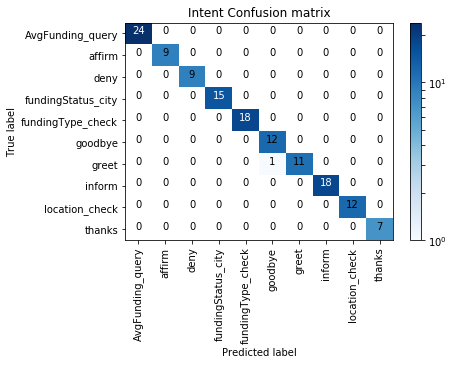

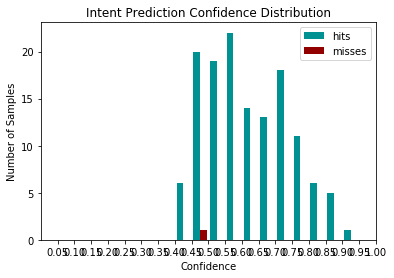

INFO:rasa_nlu.evaluate:Entity evaluation results:
INFO:rasa_nlu.evaluate:Evaluation for entity extractor: ner_crf 
INFO:rasa_nlu.evaluate:F1-Score:  1.0
INFO:rasa_nlu.evaluate:Precision: 1.0
INFO:rasa_nlu.evaluate:Accuracy:  1.0
INFO:rasa_nlu.evaluate:Classification report: 
             precision    recall  f1-score   support

       city       1.00      1.00      1.00        37
fundingType       1.00      1.00      1.00        44
  no_entity       1.00      1.00      1.00       535
    startup       1.00      1.00      1.00        44
       year       1.00      1.00      1.00        13

avg / total       1.00      1.00      1.00       673



In [5]:
from rasa_nlu.evaluate import run_evaluation

run_evaluation("intents.md", model_directory)

### Writing the Domain file:

Domain file specifies the intents, entities, slots, actions and also templates (templates for the answers the bot should respond). This has all the imporatant information the bot requires. (Basic template of all the information required for the bot). All the new actions/utterances are defined here shown as below

In [6]:
# domain_file = """

intents:
  - greet
  - goodbye
  - affirm
  - deny
  - thanks
  - location_check
  - fundingType_check
  - fundingStatus_city
  - AvgFunding_query
  - inform

slots:
  startup:
    type: text
  city:
    type: text
  fundingType:
    type: text
  year:
    type: text

entities:
  - startup
  - city
  - fundingType
  - year

actions:
  - utter_greet
  - utter_goodbye
  - utter_sure
  - utter_ok
  - utter_anymore
  - utter_smiley
  - utter_np
  - utter_what_city
  - utter_what_fundingType
  - utter_which_year
  - utter_default
  - action_get_results
  - action_check_location
  - action_check_fundingType
  - action_check_avgFunding
  - action_check_NoOfStartups
  - action_default_fallback


templates:
  utter_greet:
    - text: "RASA: Hello! Are you looking for any info about Indian Startups"
    - text: "RASA: Hey!! Do you have any questions for me about Indian Startups?"
  utter_goodbye:
    - text: "RASA: Bye! Comeback if want to know more about Indian Startup space! :) "
  utter_sure:
    - text: "RASA: Are you sure?"
  utter_ok:
    - text: "RASA: OK"
  utter_np:
    - text: "RASA: No Problem"
  utter_what_city:
    - text: "RASA: What city?"
  utter_which_year:
    - text: "RASA: Which year?"
  utter_what_fundingType:
    - text: "RASA: What type of funding you are looking for?"
  utter_smiley:
    - text: "RASA: Have a Nice day :)"
  utter_anymore:
    - text: "RASA: You have any other questions about Indian Startups?"
  utter_default:
    - text: "RASA: Sorry, I didn’t understand that. Can you please ask any other question?"


# """

# %store domain_file > domain.yml

### Writing the Stories markdown file:

This has the basic chat flow required for training the Rasa Core dialogue system. Different paths here refer to different types in which a user can interact with the bot for a type of question.

In [7]:
stories = """
## Greet
* greet
    - utter_greet

## Thanks
* thanks
    - utter_np
    - utter_anymore

## Goodbye
* goodbye
    - utter_goodbye
    - utter_smiley

## Path 1
* greet
    - utter_greet
* location_check{"startup":"Zepo"}
    - action_check_location
    - action_restart


## Path 2
* greet
    - utter_greet
* fundingType_check{"startup":"VDeliver"}
    - action_check_fundingType
    - action_restart


## Path 3
* fundingStatus_city{"fundingType": "Seed Funding","city": "Bangalore"}
    - action_check_NoOfStartups
    - action_restart


## Path 4
* fundingStatus_city{"fundingType": "Seed Funding"}
    - utter_what_city
* inform{"city": "Bangalore"}
    - action_check_NoOfStartups
    - action_restart

## Path 5
* fundingStatus_city{"city": "Bangalore"}
    - utter_what_fundingType
* inform{"fundingType": "Seed Funding"}
    - action_check_NoOfStartups
    - action_restart

## Path 6
* AvgFunding_query{"fundingType": "Seed Funding","city": "Bangalore","year":"2017"}
    - action_check_avgFunding
    - action_restart

## Path 7
* AvgFunding_query{"city": "Bangalore"}
    - utter_what_fundingType
* inform{"fundingType": "Seed Funding"}
    - utter_which_year
* inform{"year":"2017"}
    - action_check_avgFunding
    - action_restart   

## Path 8
* AvgFunding_query{"fundingType": "Seed Funding"}
    - utter_what_city
* inform{"city": "Bangalore"}
    - utter_which_year
* inform{"year":"2017"}
    - action_check_avgFunding
    - action_restart    

## Path 9
* AvgFunding_query{"year":"2017","city": "Bangalore" }
    - utter_what_fundingType
* inform{"fundingType": "Seed Funding"}
    - action_check_avgFunding
    - action_restart   

## Path 10
* AvgFunding_query{"year":"2017"}
    - utter_what_fundingType
* inform{"fundingType": "Seed Funding"}
    - utter_what_city
* inform{"city": "Bangalore"}
    - action_check_avgFunding
    - action_restart  
        
## Path 11
* AvgFunding_query
    - utter_which_year
* inform{"year":"2017"}
    - utter_what_fundingType
* inform{"fundingType": "Seed Funding"}
    - utter_what_city
* inform{"city": "Bangalore"}
    - action_check_avgFunding
    - action_restart   


"""

%store stories > stories.md

Writing 'stories' (str) to file 'stories.md'.


### Actions Python script:

The classes in the below python file refers to the actions the bot should perform for diffeerent cases of the user interaction. Each class refers to a different action that the bot will perform and dispatches the result accordingly. All these are only the custom actions which are coded in Python classes and all other remaining general utter_actions can be given directly.

In [8]:
actions_script = """
from rasa_core_sdk import Action

import pandas as pd
import requests

data = pd.read_csv("startup_funding.csv")

class LocationCheck(Action):

    def name(self):
        return "action_check_location"

    def run(self, dispatcher, tracker, domain):
        startup = tracker.get_slot('startup')
        try:
            results_location = data[data.StartupName.str.lower() == startup.lower()]
            city_name = list(set(results_location.CityLocation))[0]
            dispatcher.utter_message("RASA: {} is in the city {}".format(startup, city_name))
        except:
            dispatcher.utter_message("RASA: Sorry! I dont have information about that.")

class FundingType_query(Action):

    def name(self):
        return "action_check_fundingType"

    def run(self, dispatcher, tracker, domain):
        startup = tracker.get_slot('startup')
        results_location = data[data.StartupName.str.lower() == startup.lower()]
        funding_type = list(set(results_location.InvestmentType))[0]
        funding_year = list(set(results_location.Year))[0]
        dispatcher.utter_message("RASA: {} received {} type investment in the year {}".format(startup, funding_type, funding_year))


class StartupsInCity(Action):
    def name(self):
        return "action_check_NoOfStartups"

    def run(self, dispatcher, tracker, domain):
        fundingType = tracker.get_slot('fundingType')
        city = tracker.get_slot('city')
        city_results = data[data.CityLocation.str.lower() == city.lower()]
        results = city_results[city_results.InvestmentType.str.lower() == fundingType.lower()]
        dispatcher.utter_message("RASA: Number of Startups receiving {} type investment in the  {} city is {}!".format(fundingType, city, len(results)))


class AverageFundingCalculation(Action):
    def name(self):
        return "action_check_avgFunding"

    def run(self, dispatcher, tracker, domain):
        fundingType = tracker.get_slot('fundingType')
        city = tracker.get_slot('city')
        year = tracker.get_slot('year')
        try:
            city_results = data[data.CityLocation.str.lower() == city.lower()]
            funding_results = city_results[city_results.InvestmentType.str.lower() == fundingType.lower()]
            final_list = funding_results[funding_results.Year == int(year)]
            final_list = (final_list.AmountInUSD.dropna())
            dispatcher.utter_message("RASA: This is the Overall Statistics of {} investment received by startups in the {} city in {} is:- Median funding amount is {} USD & Average funding amount is {} USD & Maximum funding amount is {} USD".format(fundingType, city, year, final_list.median(),fundingType,final_list.mean(),final_list.max()))
        except:
            dispatcher.utter_message("RASA: Sorry! I dont have information about that.")
"""

%store actions_script > actions.py

Writing 'actions_script' (str) to file 'actions.py'.


### Training the Dialogue Model - Rasa_core

In [11]:
from rasa_core.policies import KerasPolicy, MemoizationPolicy
from rasa_core.agent import Agent

agent = Agent('domain.yml', policies=[MemoizationPolicy(), KerasPolicy()])

# loading our training dialogues
training_data = agent.load_data('stories.md')

agent.train(
    training_data,
    validation_split=0.0,
    epochs= 200
)

agent.persist('models/dialogue')



Processed Story Blocks:   0%|                                                                   | 0/14 [00:00<?, ?it/s]

Processed Story Blocks:   0%|                                                     | 0/14 [00:00<?, ?it/s, # trackers=1]

Processed Story Blocks:   0%|                                                     | 0/14 [00:00<?, ?it/s, # trackers=1]

Processed Story Blocks:   0%|                                                     | 0/14 [00:00<?, ?it/s, # trackers=1]

Processed Story Blocks:   0%|                                                     | 0/14 [00:00<?, ?it/s, # trackers=1]

Processed Story Blocks:   0%|                                                     | 0/14 [00:00<?, ?it/s, # trackers=1]

Processed Story Blocks:   0%|                                                     | 0/14 [00:00<?, ?it/s, # trackers=1]

Processed Story Blocks:   0%|                                                     | 0/14 [00:00<?, ?it/s, # trackers=1]

Processed Story Blocks:   0%| 

Processed actions: 112it [00:00, 173.10it/s, # examples=128]

Processed actions: 128it [00:00, 158.88it/s, # examples=128]

Processed actions: 128it [00:00, 158.88it/s, # examples=129]

Processed actions: 128it [00:00, 158.88it/s, # examples=130]

Processed actions: 128it [00:00, 158.88it/s, # examples=131]

Processed actions: 128it [00:00, 158.88it/s, # examples=132]

Processed actions: 128it [00:00, 158.88it/s, # examples=133]

Processed actions: 128it [00:00, 158.88it/s, # examples=134]

Processed actions: 128it [00:00, 158.88it/s, # examples=135]

Processed actions: 128it [00:00, 158.88it/s, # examples=136]

Processed actions: 128it [00:00, 158.88it/s, # examples=137]

Processed actions: 128it [00:00, 158.88it/s, # examples=138]

Processed actions: 128it [00:00, 158.88it/s, # examples=139]

Processed actions: 128it [00:00, 158.88it/s, # examples=140]

Processed actions: 128it [00:00, 158.88it/s, # examples=141]

Processed actions: 128it [00:00, 158.88it/s, # examples=142]

Processe

Processed actions: 359it [00:02, 183.71it/s, # examples=379]

Processed actions: 379it [00:02, 187.77it/s, # examples=379]

Processed actions: 379it [00:02, 187.77it/s, # examples=380]

Processed actions: 379it [00:02, 187.77it/s, # examples=381]

Processed actions: 379it [00:02, 187.77it/s, # examples=382]

Processed actions: 379it [00:02, 187.77it/s, # examples=383]

Processed actions: 379it [00:02, 187.77it/s, # examples=384]

Processed actions: 379it [00:02, 187.77it/s, # examples=385]

Processed actions: 379it [00:02, 187.77it/s, # examples=386]

Processed actions: 379it [00:02, 187.77it/s, # examples=387]

Processed actions: 379it [00:02, 187.77it/s, # examples=388]

Processed actions: 379it [00:02, 187.77it/s, # examples=389]

Processed actions: 379it [00:02, 187.77it/s, # examples=390]

Processed actions: 379it [00:02, 187.77it/s, # examples=391]

Processed actions: 379it [00:02, 187.77it/s, # examples=392]

Processed actions: 379it [00:02, 187.77it/s, # examples=393]

Processe

Processed actions: 628it [00:03, 196.26it/s, # examples=630]

Processed actions: 628it [00:03, 196.26it/s, # examples=631]

Processed actions: 628it [00:03, 196.26it/s, # examples=632]

Processed actions: 628it [00:03, 196.26it/s, # examples=633]

Processed actions: 628it [00:03, 196.26it/s, # examples=634]

Processed actions: 628it [00:03, 196.26it/s, # examples=635]

Processed actions: 628it [00:03, 196.26it/s, # examples=636]

Processed actions: 628it [00:03, 196.26it/s, # examples=637]

Processed actions: 628it [00:03, 196.26it/s, # examples=638]

Processed actions: 628it [00:03, 196.26it/s, # examples=639]

Processed actions: 628it [00:03, 196.26it/s, # examples=640]

Processed actions: 628it [00:03, 196.26it/s, # examples=641]

Processed actions: 628it [00:03, 196.26it/s, # examples=642]

Processed actions: 628it [00:03, 196.26it/s, # examples=643]

Processed actions: 628it [00:03, 196.26it/s, # examples=644]

Processed actions: 628it [00:03, 196.26it/s, # examples=645]

Processe

Processed actions: 874it [00:04, 174.67it/s, # examples=883]

Processed actions: 874it [00:04, 174.67it/s, # examples=884]

Processed actions: 874it [00:04, 174.67it/s, # examples=885]

Processed actions: 874it [00:04, 174.67it/s, # examples=886]

Processed actions: 874it [00:04, 174.67it/s, # examples=887]

Processed actions: 874it [00:04, 174.67it/s, # examples=888]

Processed actions: 874it [00:04, 174.67it/s, # examples=889]

Processed actions: 874it [00:04, 174.67it/s, # examples=890]

Processed actions: 874it [00:04, 174.67it/s, # examples=891]

Processed actions: 874it [00:04, 174.67it/s, # examples=892]

Processed actions: 874it [00:04, 174.67it/s, # examples=893]

Processed actions: 893it [00:04, 163.73it/s, # examples=893]

Processed actions: 893it [00:04, 163.73it/s, # examples=894]

Processed actions: 893it [00:05, 163.73it/s, # examples=895]

Processed actions: 893it [00:05, 163.73it/s, # examples=896]

Processed actions: 893it [00:05, 163.73it/s, # examples=897]

Processe

Processed actions: 1130it [00:07, 79.54it/s, # examples=1130]

Processed actions: 1130it [00:07, 79.54it/s, # examples=1131]

Processed actions: 1130it [00:07, 79.54it/s, # examples=1132]

Processed actions: 1130it [00:07, 79.54it/s, # examples=1133]

Processed actions: 1130it [00:07, 79.54it/s, # examples=1134]

Processed actions: 1130it [00:07, 79.54it/s, # examples=1135]

Processed actions: 1130it [00:07, 79.54it/s, # examples=1136]

Processed actions: 1130it [00:07, 79.54it/s, # examples=1137]

Processed actions: 1130it [00:07, 79.54it/s, # examples=1138]

Processed actions: 1130it [00:07, 79.54it/s, # examples=1139]

Processed actions: 1130it [00:07, 79.54it/s, # examples=1140]

Processed actions: 1130it [00:07, 79.54it/s, # examples=1141]

Processed actions: 1130it [00:07, 79.54it/s, # examples=1142]

Processed actions: 1130it [00:07, 79.54it/s, # examples=1143]

Processed actions: 1130it [00:07, 79.54it/s, # examples=1144]

Processed actions: 1130it [00:07, 79.54it/s, # examples

Processed actions: 1353it [00:09, 161.64it/s, # examples=1373]

Processed actions: 1373it [00:09, 171.51it/s, # examples=1373]

Processed actions: 1373it [00:09, 171.51it/s, # examples=1374]

Processed actions: 1373it [00:09, 171.51it/s, # examples=1375]

Processed actions: 1373it [00:09, 171.51it/s, # examples=1376]

Processed actions: 1373it [00:09, 171.51it/s, # examples=1377]

Processed actions: 1373it [00:09, 171.51it/s, # examples=1378]

Processed actions: 1373it [00:09, 171.51it/s, # examples=1379]

Processed actions: 1373it [00:09, 171.51it/s, # examples=1380]

Processed actions: 1373it [00:09, 171.51it/s, # examples=1381]

Processed actions: 1373it [00:09, 171.51it/s, # examples=1382]

Processed actions: 1373it [00:09, 171.51it/s, # examples=1383]

Processed actions: 1373it [00:09, 171.51it/s, # examples=1384]

Processed actions: 1373it [00:09, 171.51it/s, # examples=1385]

Processed actions: 1373it [00:09, 171.51it/s, # examples=1386]

Processed actions: 1373it [00:09, 171.51

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking (Masking)            (None, 5, 37)             0         
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8960      
_________________________________________________________________
dense (Dense)                (None, 19)                627       
_________________________________________________________________
activation (Activation)      (None, 19)                0         
Total params: 9,587
Trainable params: 9,587
Non-trainable params: 0
_________________________________________________________________


INFO:rasa_core.policies.keras_policy:Fitting model with 1587 total samples and a validation split of 0.0


Epoch 1/200
1587/1587 [==============================] - ETA: 1:11 - loss: 2.9113 - acc: 0.093 - ETA: 13s - loss: 2.8687 - acc: 0.162 - ETA: 8s - loss: 2.8133 - acc: 0.2422 - ETA: 5s - loss: 2.7854 - acc: 0.250 - ETA: 4s - loss: 2.7559 - acc: 0.274 - ETA: 3s - loss: 2.7199 - acc: 0.288 - ETA: 2s - loss: 2.6985 - acc: 0.298 - ETA: 2s - loss: 2.6857 - acc: 0.298 - ETA: 1s - loss: 2.6731 - acc: 0.295 - ETA: 1s - loss: 2.6405 - acc: 0.307 - ETA: 1s - loss: 2.6177 - acc: 0.304 - ETA: 0s - loss: 2.5993 - acc: 0.305 - ETA: 0s - loss: 2.5899 - acc: 0.308 - ETA: 0s - loss: 2.5722 - acc: 0.310 - ETA: 0s - loss: 2.5401 - acc: 0.316 - ETA: 0s - loss: 2.5004 - acc: 0.322 - 2s 1ms/step - loss: 2.4969 - acc: 0.3220
Epoch 2/200
1587/1587 [==============================] - ETA: 0s - loss: 2.4257 - acc: 0.343 - ETA: 0s - loss: 2.3025 - acc: 0.312 - ETA: 0s - loss: 2.2476 - acc: 0.324 - ETA: 0s - loss: 2.2442 - acc: 0.337 - ETA: 0s - loss: 2.2597 - acc: 0.330 - ETA: 0s - loss: 2.2389 - acc: 0.340 - ETA: 

1587/1587 [==============================] - ETA: 0s - loss: 0.3233 - acc: 0.937 - ETA: 0s - loss: 0.3570 - acc: 0.921 - ETA: 1s - loss: 0.3613 - acc: 0.918 - ETA: 0s - loss: 0.3081 - acc: 0.941 - ETA: 0s - loss: 0.3330 - acc: 0.932 - ETA: 0s - loss: 0.3266 - acc: 0.927 - ETA: 0s - loss: 0.3479 - acc: 0.916 - ETA: 0s - loss: 0.3566 - acc: 0.917 - ETA: 0s - loss: 0.3581 - acc: 0.917 - ETA: 0s - loss: 0.3584 - acc: 0.918 - ETA: 0s - loss: 0.3542 - acc: 0.918 - ETA: 0s - loss: 0.3490 - acc: 0.920 - ETA: 0s - loss: 0.3454 - acc: 0.923 - ETA: 0s - loss: 0.3421 - acc: 0.925 - ETA: 0s - loss: 0.3418 - acc: 0.924 - ETA: 0s - loss: 0.3409 - acc: 0.925 - ETA: 0s - loss: 0.3361 - acc: 0.927 - ETA: 0s - loss: 0.3344 - acc: 0.929 - 1s 655us/step - loss: 0.3350 - acc: 0.9282
Epoch 26/200
1587/1587 [==============================] - ETA: 0s - loss: 0.2632 - acc: 0.906 - ETA: 0s - loss: 0.2623 - acc: 0.953 - ETA: 0s - loss: 0.3139 - acc: 0.937 - ETA: 0s - loss: 0.3208 - acc: 0.934 - ETA: 0s - loss: 0.

1587/1587 [==============================] - ETA: 0s - loss: 0.0426 - acc: 1.000 - ETA: 0s - loss: 0.0959 - acc: 0.982 - ETA: 0s - loss: 0.0834 - acc: 0.988 - ETA: 0s - loss: 0.0903 - acc: 0.985 - ETA: 0s - loss: 0.1024 - acc: 0.979 - ETA: 0s - loss: 0.1054 - acc: 0.976 - ETA: 0s - loss: 0.1109 - acc: 0.974 - ETA: 0s - loss: 0.1071 - acc: 0.975 - ETA: 0s - loss: 0.1128 - acc: 0.970 - ETA: 0s - loss: 0.1081 - acc: 0.973 - ETA: 0s - loss: 0.1059 - acc: 0.975 - ETA: 0s - loss: 0.1047 - acc: 0.975 - 1s 424us/step - loss: 0.1041 - acc: 0.9754
Epoch 50/200
1587/1587 [==============================] - ETA: 0s - loss: 0.2170 - acc: 0.937 - ETA: 0s - loss: 0.1432 - acc: 0.956 - ETA: 0s - loss: 0.1262 - acc: 0.965 - ETA: 0s - loss: 0.1179 - acc: 0.971 - ETA: 0s - loss: 0.1152 - acc: 0.972 - ETA: 0s - loss: 0.1094 - acc: 0.974 - ETA: 0s - loss: 0.1027 - acc: 0.975 - ETA: 0s - loss: 0.1033 - acc: 0.973 - ETA: 0s - loss: 0.0963 - acc: 0.975 - ETA: 0s - loss: 0.0961 - acc: 0.975 - ETA: 0s - loss: 0.

Epoch 73/200
1587/1587 [==============================] - ETA: 0s - loss: 0.0320 - acc: 1.000 - ETA: 0s - loss: 0.0336 - acc: 0.992 - ETA: 0s - loss: 0.0620 - acc: 0.989 - ETA: 0s - loss: 0.0566 - acc: 0.987 - ETA: 0s - loss: 0.0538 - acc: 0.988 - ETA: 0s - loss: 0.0531 - acc: 0.990 - ETA: 0s - loss: 0.0522 - acc: 0.990 - ETA: 0s - loss: 0.0536 - acc: 0.991 - ETA: 0s - loss: 0.0567 - acc: 0.988 - ETA: 0s - loss: 0.0565 - acc: 0.988 - ETA: 0s - loss: 0.0538 - acc: 0.989 - ETA: 0s - loss: 0.0577 - acc: 0.987 - ETA: 0s - loss: 0.0584 - acc: 0.986 - ETA: 0s - loss: 0.0569 - acc: 0.987 - ETA: 0s - loss: 0.0536 - acc: 0.988 - 1s 537us/step - loss: 0.0526 - acc: 0.9893
Epoch 74/200
1587/1587 [==============================] - ETA: 0s - loss: 0.0419 - acc: 1.000 - ETA: 0s - loss: 0.0598 - acc: 0.984 - ETA: 0s - loss: 0.0486 - acc: 0.984 - ETA: 0s - loss: 0.0465 - acc: 0.985 - ETA: 0s - loss: 0.0616 - acc: 0.981 - ETA: 0s - loss: 0.0532 - acc: 0.984 - ETA: 0s - loss: 0.0591 - acc: 0.982 - ETA: 

1587/1587 [==============================] - ETA: 0s - loss: 0.0228 - acc: 1.000 - ETA: 0s - loss: 0.0327 - acc: 0.993 - ETA: 0s - loss: 0.0341 - acc: 0.992 - ETA: 0s - loss: 0.0313 - acc: 0.993 - ETA: 0s - loss: 0.0268 - acc: 0.995 - ETA: 0s - loss: 0.0254 - acc: 0.996 - ETA: 0s - loss: 0.0233 - acc: 0.996 - ETA: 0s - loss: 0.0227 - acc: 0.997 - ETA: 0s - loss: 0.0260 - acc: 0.996 - ETA: 0s - loss: 0.0259 - acc: 0.995 - ETA: 0s - loss: 0.0241 - acc: 0.996 - ETA: 0s - loss: 0.0241 - acc: 0.995 - ETA: 0s - loss: 0.0242 - acc: 0.995 - ETA: 0s - loss: 0.0270 - acc: 0.993 - ETA: 0s - loss: 0.0307 - acc: 0.991 - ETA: 0s - loss: 0.0310 - acc: 0.991 - ETA: 0s - loss: 0.0316 - acc: 0.991 - 1s 605us/step - loss: 0.0314 - acc: 0.9912
Epoch 98/200
1587/1587 [==============================] - ETA: 0s - loss: 0.0332 - acc: 1.000 - ETA: 0s - loss: 0.0312 - acc: 0.992 - ETA: 0s - loss: 0.0252 - acc: 0.995 - ETA: 0s - loss: 0.0219 - acc: 0.993 - ETA: 0s - loss: 0.0239 - acc: 0.995 - ETA: 0s - loss: 0.

1587/1587 [==============================] - ETA: 0s - loss: 0.0047 - acc: 1.000 - ETA: 0s - loss: 0.0191 - acc: 1.000 - ETA: 0s - loss: 0.0165 - acc: 1.000 - ETA: 0s - loss: 0.0226 - acc: 0.996 - ETA: 0s - loss: 0.0264 - acc: 0.995 - ETA: 0s - loss: 0.0255 - acc: 0.995 - ETA: 0s - loss: 0.0266 - acc: 0.994 - ETA: 0s - loss: 0.0232 - acc: 0.995 - ETA: 0s - loss: 0.0221 - acc: 0.995 - ETA: 0s - loss: 0.0208 - acc: 0.996 - ETA: 0s - loss: 0.0212 - acc: 0.995 - ETA: 0s - loss: 0.0200 - acc: 0.996 - ETA: 0s - loss: 0.0191 - acc: 0.996 - ETA: 0s - loss: 0.0223 - acc: 0.995 - ETA: 0s - loss: 0.0224 - acc: 0.995 - ETA: 0s - loss: 0.0213 - acc: 0.995 - ETA: 0s - loss: 0.0247 - acc: 0.994 - 1s 653us/step - loss: 0.0246 - acc: 0.9943
Epoch 122/200
1587/1587 [==============================] - ETA: 0s - loss: 0.0291 - acc: 1.000 - ETA: 0s - loss: 0.0161 - acc: 1.000 - ETA: 0s - loss: 0.0261 - acc: 0.995 - ETA: 0s - loss: 0.0296 - acc: 0.993 - ETA: 0s - loss: 0.0256 - acc: 0.995 - ETA: 0s - loss: 0

1587/1587 [==============================] - ETA: 0s - loss: 0.0065 - acc: 1.000 - ETA: 0s - loss: 0.0251 - acc: 0.993 - ETA: 0s - loss: 0.0243 - acc: 0.992 - ETA: 0s - loss: 0.0285 - acc: 0.989 - ETA: 0s - loss: 0.0242 - acc: 0.992 - ETA: 0s - loss: 0.0245 - acc: 0.991 - ETA: 0s - loss: 0.0222 - acc: 0.993 - ETA: 0s - loss: 0.0200 - acc: 0.994 - ETA: 0s - loss: 0.0182 - acc: 0.994 - ETA: 0s - loss: 0.0183 - acc: 0.994 - ETA: 0s - loss: 0.0175 - acc: 0.994 - ETA: 0s - loss: 0.0163 - acc: 0.995 - ETA: 0s - loss: 0.0173 - acc: 0.995 - ETA: 0s - loss: 0.0196 - acc: 0.994 - ETA: 0s - loss: 0.0193 - acc: 0.994 - 1s 538us/step - loss: 0.0191 - acc: 0.9950
Epoch 144/200
1587/1587 [==============================] - ETA: 1s - loss: 0.0033 - acc: 1.000 - ETA: 0s - loss: 0.0079 - acc: 1.000 - ETA: 1s - loss: 0.0127 - acc: 0.994 - ETA: 1s - loss: 0.0100 - acc: 0.996 - ETA: 1s - loss: 0.0109 - acc: 0.996 - ETA: 1s - loss: 0.0100 - acc: 0.997 - ETA: 1s - loss: 0.0124 - acc: 0.996 - ETA: 0s - loss: 0

1587/1587 [==============================] - ETA: 1s - loss: 0.0241 - acc: 1.000 - ETA: 0s - loss: 0.0205 - acc: 1.000 - ETA: 0s - loss: 0.0210 - acc: 0.995 - ETA: 0s - loss: 0.0201 - acc: 0.993 - ETA: 0s - loss: 0.0213 - acc: 0.992 - ETA: 0s - loss: 0.0262 - acc: 0.991 - ETA: 0s - loss: 0.0224 - acc: 0.993 - ETA: 0s - loss: 0.0209 - acc: 0.994 - ETA: 0s - loss: 0.0188 - acc: 0.994 - ETA: 0s - loss: 0.0187 - acc: 0.995 - ETA: 0s - loss: 0.0181 - acc: 0.995 - ETA: 0s - loss: 0.0172 - acc: 0.995 - ETA: 0s - loss: 0.0163 - acc: 0.996 - ETA: 0s - loss: 0.0163 - acc: 0.996 - ETA: 0s - loss: 0.0159 - acc: 0.996 - ETA: 0s - loss: 0.0150 - acc: 0.996 - ETA: 0s - loss: 0.0166 - acc: 0.995 - ETA: 0s - loss: 0.0209 - acc: 0.994 - ETA: 0s - loss: 0.0211 - acc: 0.994 - 1s 712us/step - loss: 0.0209 - acc: 0.9943
Epoch 168/200
1587/1587 [==============================] - ETA: 0s - loss: 0.1139 - acc: 0.937 - ETA: 0s - loss: 0.0231 - acc: 0.989 - ETA: 0s - loss: 0.0179 - acc: 0.993 - ETA: 0s - loss: 0

1587/1587 [==============================] - ETA: 0s - loss: 0.0027 - acc: 1.000 - ETA: 0s - loss: 0.0042 - acc: 1.000 - ETA: 1s - loss: 0.0130 - acc: 0.993 - ETA: 1s - loss: 0.0121 - acc: 0.994 - ETA: 1s - loss: 0.0129 - acc: 0.996 - ETA: 1s - loss: 0.0118 - acc: 0.997 - ETA: 1s - loss: 0.0120 - acc: 0.997 - ETA: 1s - loss: 0.0107 - acc: 0.997 - ETA: 0s - loss: 0.0105 - acc: 0.998 - ETA: 0s - loss: 0.0102 - acc: 0.998 - ETA: 0s - loss: 0.0097 - acc: 0.998 - ETA: 0s - loss: 0.0092 - acc: 0.999 - ETA: 0s - loss: 0.0133 - acc: 0.997 - ETA: 0s - loss: 0.0143 - acc: 0.996 - ETA: 0s - loss: 0.0140 - acc: 0.996 - 1s 574us/step - loss: 0.0154 - acc: 0.9956
Epoch 189/200
1587/1587 [==============================] - ETA: 0s - loss: 0.0356 - acc: 1.000 - ETA: 0s - loss: 0.0204 - acc: 0.995 - ETA: 0s - loss: 0.0196 - acc: 0.994 - ETA: 0s - loss: 0.0157 - acc: 0.996 - ETA: 0s - loss: 0.0161 - acc: 0.995 - ETA: 0s - loss: 0.0149 - acc: 0.996 - ETA: 0s - loss: 0.0148 - acc: 0.996 - ETA: 0s - loss: 0

INFO:rasa_core.policies.keras_policy:Done fitting keras policy model
INFO:rasa_core.agent:Model directory models/dialogue exists and contains old model files. All files will be overwritten.
INFO:rasa_core.agent:Persisted model to 'C:\mie451\assignment-cai-sundeeppothula\assignment\models\dialogue'


### Defining the fallback actions 

These corresponds to the cases where bot fails to classify/identify the intent of the users query. Default threshold of 0.3 is taken (if the bot's predicted intent probability is less than 0.3 than it gives the fallback action response)

In [23]:
from rasa_core.policies.fallback import FallbackPolicy
from rasa_core.policies.keras_policy import KerasPolicy
from rasa_core.agent import Agent

fallback = FallbackPolicy(fallback_action_name="action_default_fallback",
                          core_threshold=0.3,
                          nlu_threshold=0.3)

agent = Agent("domain.yml", policies=[KerasPolicy(), fallback])

In [24]:
from rasa_core.agent import Agent

agent = Agent.load('models/dialogue', interpreter = model_directory)

INFO:rasa_nlu.components:Added 'nlp_spacy' to component cache. Key 'nlp_spacy-en'.


---
# Interaction Demo


In [14]:
!type endpoint.yml

action_endpoint:
  url: "http://localhost:5055/webhook"


In [16]:
def chatbot():
    import IPython
    from IPython.display import clear_output
    from rasa_core.agent import Agent
    from rasa_core.interpreter import NaturalLanguageInterpreter
    from rasa_core.utils import EndpointConfig

    messages = ["Hi! you can chat in this window. You can ask questions about Indian Startups & Type 'stop' to end the conversation."]
    interpreter = NaturalLanguageInterpreter.create('models/nlu/default/current/')
    endpoint = EndpointConfig('http://localhost:5055/webhook')
    agent = Agent.load('models/dialogue', interpreter=interpreter, action_endpoint = endpoint)
    tracker = agent.tracker_store.get_or_create_tracker("sender_id") 
    # get current tracker state
    tracker.current_state()

    print("Your bot is ready to talk! Type your messages here or send 'stop'")
    while True:
        a = input()
        if a == 'stop':
            break
        responses = agent.handle_text(a)
        for response in responses:
            print(response["text"])

### Q1. One-step interaction requiring at least one slot filler.

### Chatbot Conversation

In [17]:
chatbot()        ## calling the above defined function 

INFO:rasa_nlu.components:Added 'nlp_spacy' to component cache. Key 'nlp_spacy-en'.


Your bot is ready to talk! Type your messages here or send 'stop'
Hey
RASA: Hello! Are you looking for any info about Indian Startups
Yes! where is Leverage Edu located?
RASA: leverage edu is in the city New Delhi
Location of makemytrip?
RASA: makemytrip is in the city Gurgaon
Where is Hypernova Interactive located?
RASA: Sorry! I dont have information about that.
Can I know Headquarters of Zepo?
RASA: zepo is in the city Mumbai
Thanks
RASA: No Problem
RASA: You have any other questions about Indian Startups?
What type of fundinng did Endless robotics get?
RASA: endless robotics received Seed Funding type investment in the year 2016
Can I have information about type of recent funding closed by Zomato?
RASA: zomato received Private Equity type investment in the year 2015
Thanks
RASA: No Problem
RASA: You have any other questions about Indian Startups?
Nope! Bye
RASA: Bye! Comeback if want to know more about Indian Startup space! :) 
RASA: Have a Nice day :)
stop


---
**Slot filler:** Startup - Name of the startup (Bot should identify this entity from the query)

**Query1:** Where is Leverage Edu (startup) located?

In this interaction the slot filler is "Leverage Edu" which is the startup name. Bot idetifies this entity and users intent for finding the Startup location and it searches for the Startup_location from the dataset

**Query2:** What type of funding did "Endless Robotics" get?

In this interaction the slot filler is "Endless Robotics" which is the startup name. Bot idetifies this entity and users intent for finding the type of funding and it searches for the Investment_type from the dataset

---
**Stories.md** (Corresponding Paths for the above question):

#### Path 1
* greet
    - utter_greet
* location_check{"startup":"Zepo"}
    - action_check_location
    - action_restart


#### Path 2
* greet
    - utter_greet
* fundingType_check{"startup":"VDeliver"}
    - action_check_fundingType
    - action_restart


These are story paths for the above question. Explainations for these paths mentioned given above. action_restart at the end of each story is mentioned so that it will reset all the slots for the next question.

----
**Action Script:** for calculating number of startups receiving **Type0fFunding** in a **city**

#### Code:

class LocationCheck(Action):

    def name(self):
        return "action_check_location"

    def run(self, dispatcher, tracker, domain):
        startup = tracker.get_slot('startup')
        try:
        
       ## Extract data from dataset containing the Startup Information user mentioned. 
        
            results_location = data[data.StartupName.str.lower() == startup.lower()]
       ## If a startup received multiple fundings (since they will have same location so we are taking only one entry)
            
            city_name = list(set(results_location.CityLocation))[0]
       ## dispatch the result
            dispatcher.utter_message("{} is in the city {}".format(startup, city_name))
        except:
            dispatcher.utter_message("Sorry! I dont have information about that.")

class FundingType_query(Action):

    def name(self):
        return "action_check_fundingType"

    def run(self, dispatcher, tracker, domain):
        startup = tracker.get_slot('startup')
        try: 
        
      ## Extract data from dataset containing the Startup Information user mentioned.
            results_location = data[data.StartupName.str.lower() == startup.lower()]
       ## If a startup received multiple fundings (since they will have same location so we are taking only one entry)
            funding_type = list(set(results_location.InvestmentType))[0]
            funding_year = list(set(results_location.Year))[0]
            
            dispatcher.utter_message("{} received {} type investment in the year {}".format(startup, funding_type, funding_year))
        except:
            dispatcher.utter_message("Sorry! I dont have information about that.")



---
**Information:**

from the above conversation we can see that bot was able to clearly identify the users intent in most of the cases whether it is Location_search or Investment_type_search and it is giving actions accordingly.

Also, when asked for startup location for "Hypernova Interactive" bot was recognising the entity only as "Hypernova" and replying that it dont have information about that. Training with more entitiy and more user questions data can help to solve this issue. Also, In the cases when it is not fiding the intents then it is giving fallback actions.


### Q2. Atleast one slot filler and at least two paths

### Chatbot Conversation

In [18]:
chatbot()

INFO:rasa_nlu.components:Added 'nlp_spacy' to component cache. Key 'nlp_spacy-en'.


Your bot is ready to talk! Type your messages here or send 'stop'
Hello
RASA: Hello! Are you looking for any info about Indian Startups
Can I know number of startups who got seed funding in Mumbai?
RASA: Number of Startups receiving seed funding type investment in the  mumbai city is 227!
Info on startup funding in Mumbai?
RASA: What type of funding you are looking for?
Seed funding
RASA: Number of Startups receiving seed funding type investment in the  mumbai city is 227!
Tell me about startups which got seed funding?
RASA: What city?
Mumbai
RASA: Number of Startups receiving seed funding type investment in the  mumbai city is 227!
Thanks Bye!
RASA: Bye! Comeback if want to know more about Indian Startup space! :) 
RASA: Have a Nice day :)
stop


---
**Slot filler:** 
We have two slot fillers in this case -

city - Location of the startup 

fundingType - Type of funding received by Startup

-----------

**Query:** Query is to find number of startups receiving **particular type of funding** in a **particulaar city**

Here different paths indicates different ways in which user can query the question for the same intention

**Path1:**
Question: Can I know number of startups who got seed funding in Mumbai?
 - Here user directly gave type of funding and city name and asked for number of startups who received funding?
 
**Path2:**
Question: Info on startup funding in Mumbai?
 - User gave only the city name (Bot identifies the intention and asks for type of funding)
 - User Inputs Type of funding as the response
 - Bot gives the final answers mentioning the number of startups which got the given type of funding.
 
**Path3:**
Question: Tell me about startups which got seed funding?
 - User gave only type of funding here (Bot asks for city in which user needs information)
 - User inputs City name
 - Bot gives the final answers mentioning the number of startups which got that type of funding.

---
**Stories.md** (Corresponding Paths for the above question):

#### Path 1
* fundingStatus_city{"fundingType": "Seed Funding","city": "Bangalore"}
    - action_check_NoOfStartups
    - action_restart


#### Path 2
* fundingStatus_city{"fundingType": "Seed Funding"}
    - utter_what_city
* inform{"city": "Bangalore"}
    - action_check_NoOfStartups
    - action_restart

#### Path 3
* fundingStatus_city{"city": "Bangalore"}
    - utter_what_fundingType
* inform{"fundingType": "Seed Funding"}
    - action_check_NoOfStartups
    - action_restart


These are story paths for the above question. Explainations for these paths mentioned given above. action_restart at the end of each story is mentioned so that it will reset all the slots for the next question.

----
**Action Script:** for calculating number of startups receiving **Type0fFunding** in a **city**

#### Code:

class StartupsInCity(Action):
    
    def name(self):
        return "action_check_NoOfStartups"

    def run(self, dispatcher, tracker, domain):
        fundingType = tracker.get_slot('fundingType')
        city = tracker.get_slot('city')
        
        ## Extract data from dataset containing the city user mentioned. 
        city_results = data[data.CityLocation.str.lower() == city.lower()] 
        
        ## Extract data from the above screened dataa conating the type of funding user queryed
        results = city_results[city_results.InvestmentType.str.lower() == fundingType.lower()]
        
        ## Calculate the number of data entries in this final screened data and returning the message
        dispatcher.utter_message("Number of Startups receiving {} type investment in the  {} city is {}!".format(fundingType, city, len(results)))


#### Information:

From the above chat we can clearly see that Same question asked in different paths bot is understanding the intent, asking relevant followups and giving same answer for all the paths.


### Q3. Atleast two slot fillers and at least three paths.

### Chatbot Conversation

In [20]:
chatbot()

INFO:rasa_nlu.components:Added 'nlp_spacy' to component cache. Key 'nlp_spacy-en'.


Your bot is ready to talk! Type your messages here or send 'stop'
Hello!
RASA: Hello! Are you looking for any info about Indian Startups
What is the avg. seed funding received by startups in Hyderabad in 2016?
RASA: This is the Overall Statistics of seed funding investment received by startups in the hyderabad city in 2016 is:- Median funding amount is 380000.0 USD & Average funding amount is seed funding USD & Maximum funding amount is 468571.4285714286 USD
Can I know average funding amounts received by startups in Hyderabad in 2016?
RASA: What type of funding you are looking for?
Seed Funding
RASA: This is the Overall Statistics of seed funding investment received by startups in the hyderabad city in 2016 is:- Median funding amount is 380000.0 USD & Average funding amount is seed funding USD & Maximum funding amount is 468571.4285714286 USD
what is the average funding amount received by startups?
RASA: Which year?
2016
RASA: What type of funding you are looking for?
Seed funding
RASA

---
**Slot filler:** 
We have three slot fillers in this case -

city - Location of the startup 

fundingType - Type of funding received by Startup

year - Year in which funding is received

-----------

**Query:** Query is to find average amount of **particular type of funding** received by  startups in a **particulaar city** in a **particular year**

Here different paths indicates different ways in which user can query the question for the same intention

**Path1:**
Question: What is the avg. seed funding received by startups in Hyderabad in 2016?
 - Here user directly gave type of funding, year and city name and asked for average funding amount received?
 
**Path2:**
Question: Can I know average funding amounts received by startups in Hyderabad in 2016?
 - User gave only the city name and year (Bot identifies the intention and asks for type of funding)
 - User Inputs Type of funding as the response
 - Bot gives the final answers mentioning the overall statistics for type of investments in that city and year.
 
**Path3:**
Question: what is the average funding amount received by startups?
 - User asked a general question (Bot asks for year, type of funding and city in the order)
 - User gives the inputs for each
 - Bot gives the final answers mentioning the overall statistics for type of investments in that city and year.
 
**Path4:**
Question: Can I know about avg amount of fundings closed by startups in Hyderabad?
 - User gave only city name in the question (Bot asks for year, type of funding in the order)
 - User gives the inputs for each
 - Bot gives the final answers mentioning the overall statistics for type of investments in that city and year.
 
**Path5:**
Question: what is the average funding status in 2016?
 - User gave only year in the question (Bot asks for type of funding and city in the order)
 - User gives the inputs for each
 - Bot gives the final answers mentioning the overall statistics for type of investments in that city and year.
 

---
**Stories.md** (Corresponding Paths for the above question 3):

#### Path 1
* AvgFunding_query{"fundingType": "Seed Funding","city": "Bangalore","year":"2017"}
    - action_check_avgFunding
    - action_restart

#### Path 2
* AvgFunding_query{"city": "Bangalore"}
    - utter_what_fundingType
* inform{"fundingType": "Seed Funding"}
    - utter_which_year
* inform{"year":"2017"}
    - action_check_avgFunding
    - action_restart   

#### Path 3
* AvgFunding_query{"fundingType": "Seed Funding"}
    - utter_what_city
* inform{"city": "Bangalore"}
    - utter_which_year
* inform{"year":"2017"}
    - action_check_avgFunding
    - action_restart    

#### Path 4
* AvgFunding_query{"year":"2017"}
    - utter_what_fundingType
* inform{"fundingType": "Seed Funding"}
    - utter_what_city
* inform{"city": "Bangalore"}
    - action_check_avgFunding
    - action_restart   

#### Path 5
* AvgFunding_query
    - utter_which_year
* inform{"year":"2017"}
    - utter_what_fundingType
* inform{"fundingType": "Seed Funding"}
    - utter_what_city
* inform{"city": "Bangalore"}
    - action_check_avgFunding
    - action_restart   

These are story paths for the above question. Explainations for these paths mentioned given above. action_restart at the end of each story is mentioned so that it will reset all the slots for the next question.

---
**Action Script:** for AverageFundingCalculation of given **Type0fFunding** in a **city** in the given **year**

#### Code:

class AverageFundingCalculation(Action):
    
    def name(self):
        return "action_check_avgFunding"

    def run(self, dispatcher, tracker, domain):
        fundingType = tracker.get_slot('fundingType')
        city = tracker.get_slot('city')
        year = tracker.get_slot('year')
        try:
        
        ## Extract data from dataset containing the city user mentioned. 

            city_results = data[data.CityLocation.str.lower() == city.lower()]
        ## Extract data from the above screened data for the type of funding user mentioned.

            funding_results = city_results[city_results.InvestmentType.str.lower() == fundingType.lower()]
            
        ## Extract data from the above screened data for the user mentioned year
            final_list = funding_results[funding_results.Year == int(year)]
            
        ## Dropping all rows which dont have funding amounts
            final_list = (final_list.AmountInUSD.dropna())
        
        ## Calculate the stats for the funding amount for the above screened data and dispatch the result
            dispatcher.utter_message("This is the Overall Statistics of {} investment received by startups in the {} city in {} is:- Median funding amount is {} USD & Average funding amount is {} USD & Maximum funding amount is {} USD".format(fundingType, city, year, final_list.median(),fundingType,final_list.mean(),final_list.max()))
        
        ## Exception given when any of the user inputs is not found and which results  in error.
        except:
            dispatcher.utter_message("Sorry! I dont have information about that.")


---
### Information:

From the above chat we can clearly see that Same question asked in different paths bot is understanding the intent, asking relevant followups and giving same answer for all the paths.

### Overall Conversation 

In [26]:
chatbot()

INFO:rasa_nlu.components:Added 'nlp_spacy' to component cache. Key 'nlp_spacy-en'.


Your bot is ready to talk! Type your messages here or send 'stop'
Hey!
RASA: Hey!! Do you have any questions for me about Indian Startups?
Where is Swiggy located?
RASA: swiggy is in the city Bangalore
Can I know what type of funding MakemyTrip got?
RASA: makemytrip received Private Equity type investment in the year 2016
How many startups got Private Equity funding in Mumbai?
RASA: Number of Startups receiving private equity type investment in the  mumbai city is 218!
Can I know number of startups getting funding in Pune?
RASA: What type of funding you are looking for?
Private equity
RASA: Number of Startups receiving private equity type investment in the  pune city is 34!
Do you have info about number of starups getting Seed Funding?
RASA: What city?
Gurgaon
RASA: Which year?
2017
RASA: This is the Overall Statistics of seed funding investment received by startups in the gurgaon city in 2017 is:- Median funding amount is 200000.0 USD & Average funding amount is seed funding USD & Max

---
We can see that bot is able to predict intents correctly for most of the above questions. Also, since we are resetting slots it is not carrying the entities to the consecutive questions asked.

---
### Story Graph:
    
Below is the story graph generated for different paths defined. Although it is not clear here, Clear version of .png file can be seen the directory. (Story graph is not generated in DSVM - since we need to install additional libraries here, it is run in my laptop instead of DSVM and .png file is shown here)

![alt text](story_graph_Startups.png "story_graph_Startups")

---